# Converting AIF To Pandas

In [1]:
%env GAIA=/Volumes/GoogleDrive/Shared drives/GAIA/datasets/kgtk

env: GAIA=/Volumes/GoogleDrive/Shared drives/GAIA/datasets/kgtk


In [2]:
import numpy as np
import pandas as pd
import os
import io
from IPython.display import display, HTML, Image

In [3]:
os.chdir(os.getenv("GAIA"))

### Convert AIF triples to TSV KGTK format

In [4]:
!head ta1/HC00001DO/HC00001DO.ttl.nt

<http://www.isi.edu/gaia/entities/e34874a6-a857-4f14-8aee-9947d3e9caaf> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <https://tac.nist.gov/tracks/SM-KBP/2019/ontologies/InterchangeOntology#Entity> .
<http://www.isi.edu/gaia/entities/e34874a6-a857-4f14-8aee-9947d3e9caaf> <https://tac.nist.gov/tracks/SM-KBP/2019/ontologies/InterchangeOntology#informativeJustification> _:b0 .
<http://www.isi.edu/gaia/entities/e34874a6-a857-4f14-8aee-9947d3e9caaf> <https://tac.nist.gov/tracks/SM-KBP/2019/ontologies/InterchangeOntology#justifiedBy> _:b1 .
<http://www.isi.edu/gaia/entities/e34874a6-a857-4f14-8aee-9947d3e9caaf> <https://tac.nist.gov/tracks/SM-KBP/2019/ontologies/InterchangeOntology#privateData> _:g0 .
_:g0 <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <https://tac.nist.gov/tracks/SM-KBP/2019/ontologies/InterchangeOntology#PrivateData> .
_:g0 <https://tac.nist.gov/tracks/SM-KBP/2019/ontologies/InterchangeOntology#jsonContent> "{\"fileType\":\"en\"}"^^<http://www.w3.org/2001/XMLSchema#

**Define prefixes to compress the URIs**

In [5]:
pd.read_csv("aida-namespaces.tsv", delimiter='\t')

,node1,label,node2
0,entity,prefix_expansion,http://www.isi.edu/gaia/entities/
1,relation,prefix_expansion,http://www.isi.edu/gaia/relations/
2,event,prefix_expansion,http://www.isi.edu/gaia/events/
3,rdf,prefix_expansion,http://www.w3.org/1999/02/22-rdf-syntax-ns#
4,ont,prefix_expansion,https://tac.nist.gov/tracks/SM-KBP/2019/ontolo...
5,rpi,prefix_expansion,http://www.rpi.edu/
6,xml-schema-type,prefix_expansion,http://www.w3.org/2001/XMLSchema#
7,columbia,prefix_expansion,http://www.columbia.edu/
8,isi,prefix_expansion,http://www.isi.edu/
9,isi1,prefix_expansion,www.isi.edu/


**Import the AIF triples**

In [6]:
!time kgtk import_ntriples2 -i ta1/HC00001DO/HC00001DO.ttl.nt \
  --namespace-file aida-namespaces.tsv \
  --namespace-id-use-uuid True \
  --local-namespace-use-uuid False \
  --local-namespace-prefix _ \
  --newnode-use-uuid True  \
  / sort \
  > ta1/HC00001DO/HC00001DO.ttl.tsv


real	0m10.758s
user	0m5.090s
sys	0m1.989s


**Reified information is cumbersome to work with**

In [7]:
ta1 = pd.read_csv("ta1/HC00001DO/HC00001DO.ttl.tsv", delimiter='\t')
display(HTML(ta1.loc[ta1.node1 =='_:g10'].to_html()))

,node1,label,node2
11909,_:g10,ont:confidence,_:g11
11910,_:g10,ont:justifiedBy,_:g12
11911,_:g10,ont:system,rpi1:
11912,_:g10,rdf:object,entity:c72e94f4-e4d1-45de-966f-b52cf4d6de5e
11913,_:g10,rdf:predicate,ldc:Transaction.TransferOwnership_Artifact
11914,_:g10,rdf:subject,event:9100be93-931d-4ee0-89aa-50e7d06f773e
11915,_:g10,rdf:type,rdf:Statement


## Simplify the KG

**What we want an easy to understand representation that is close to the diagrams that people want to see**

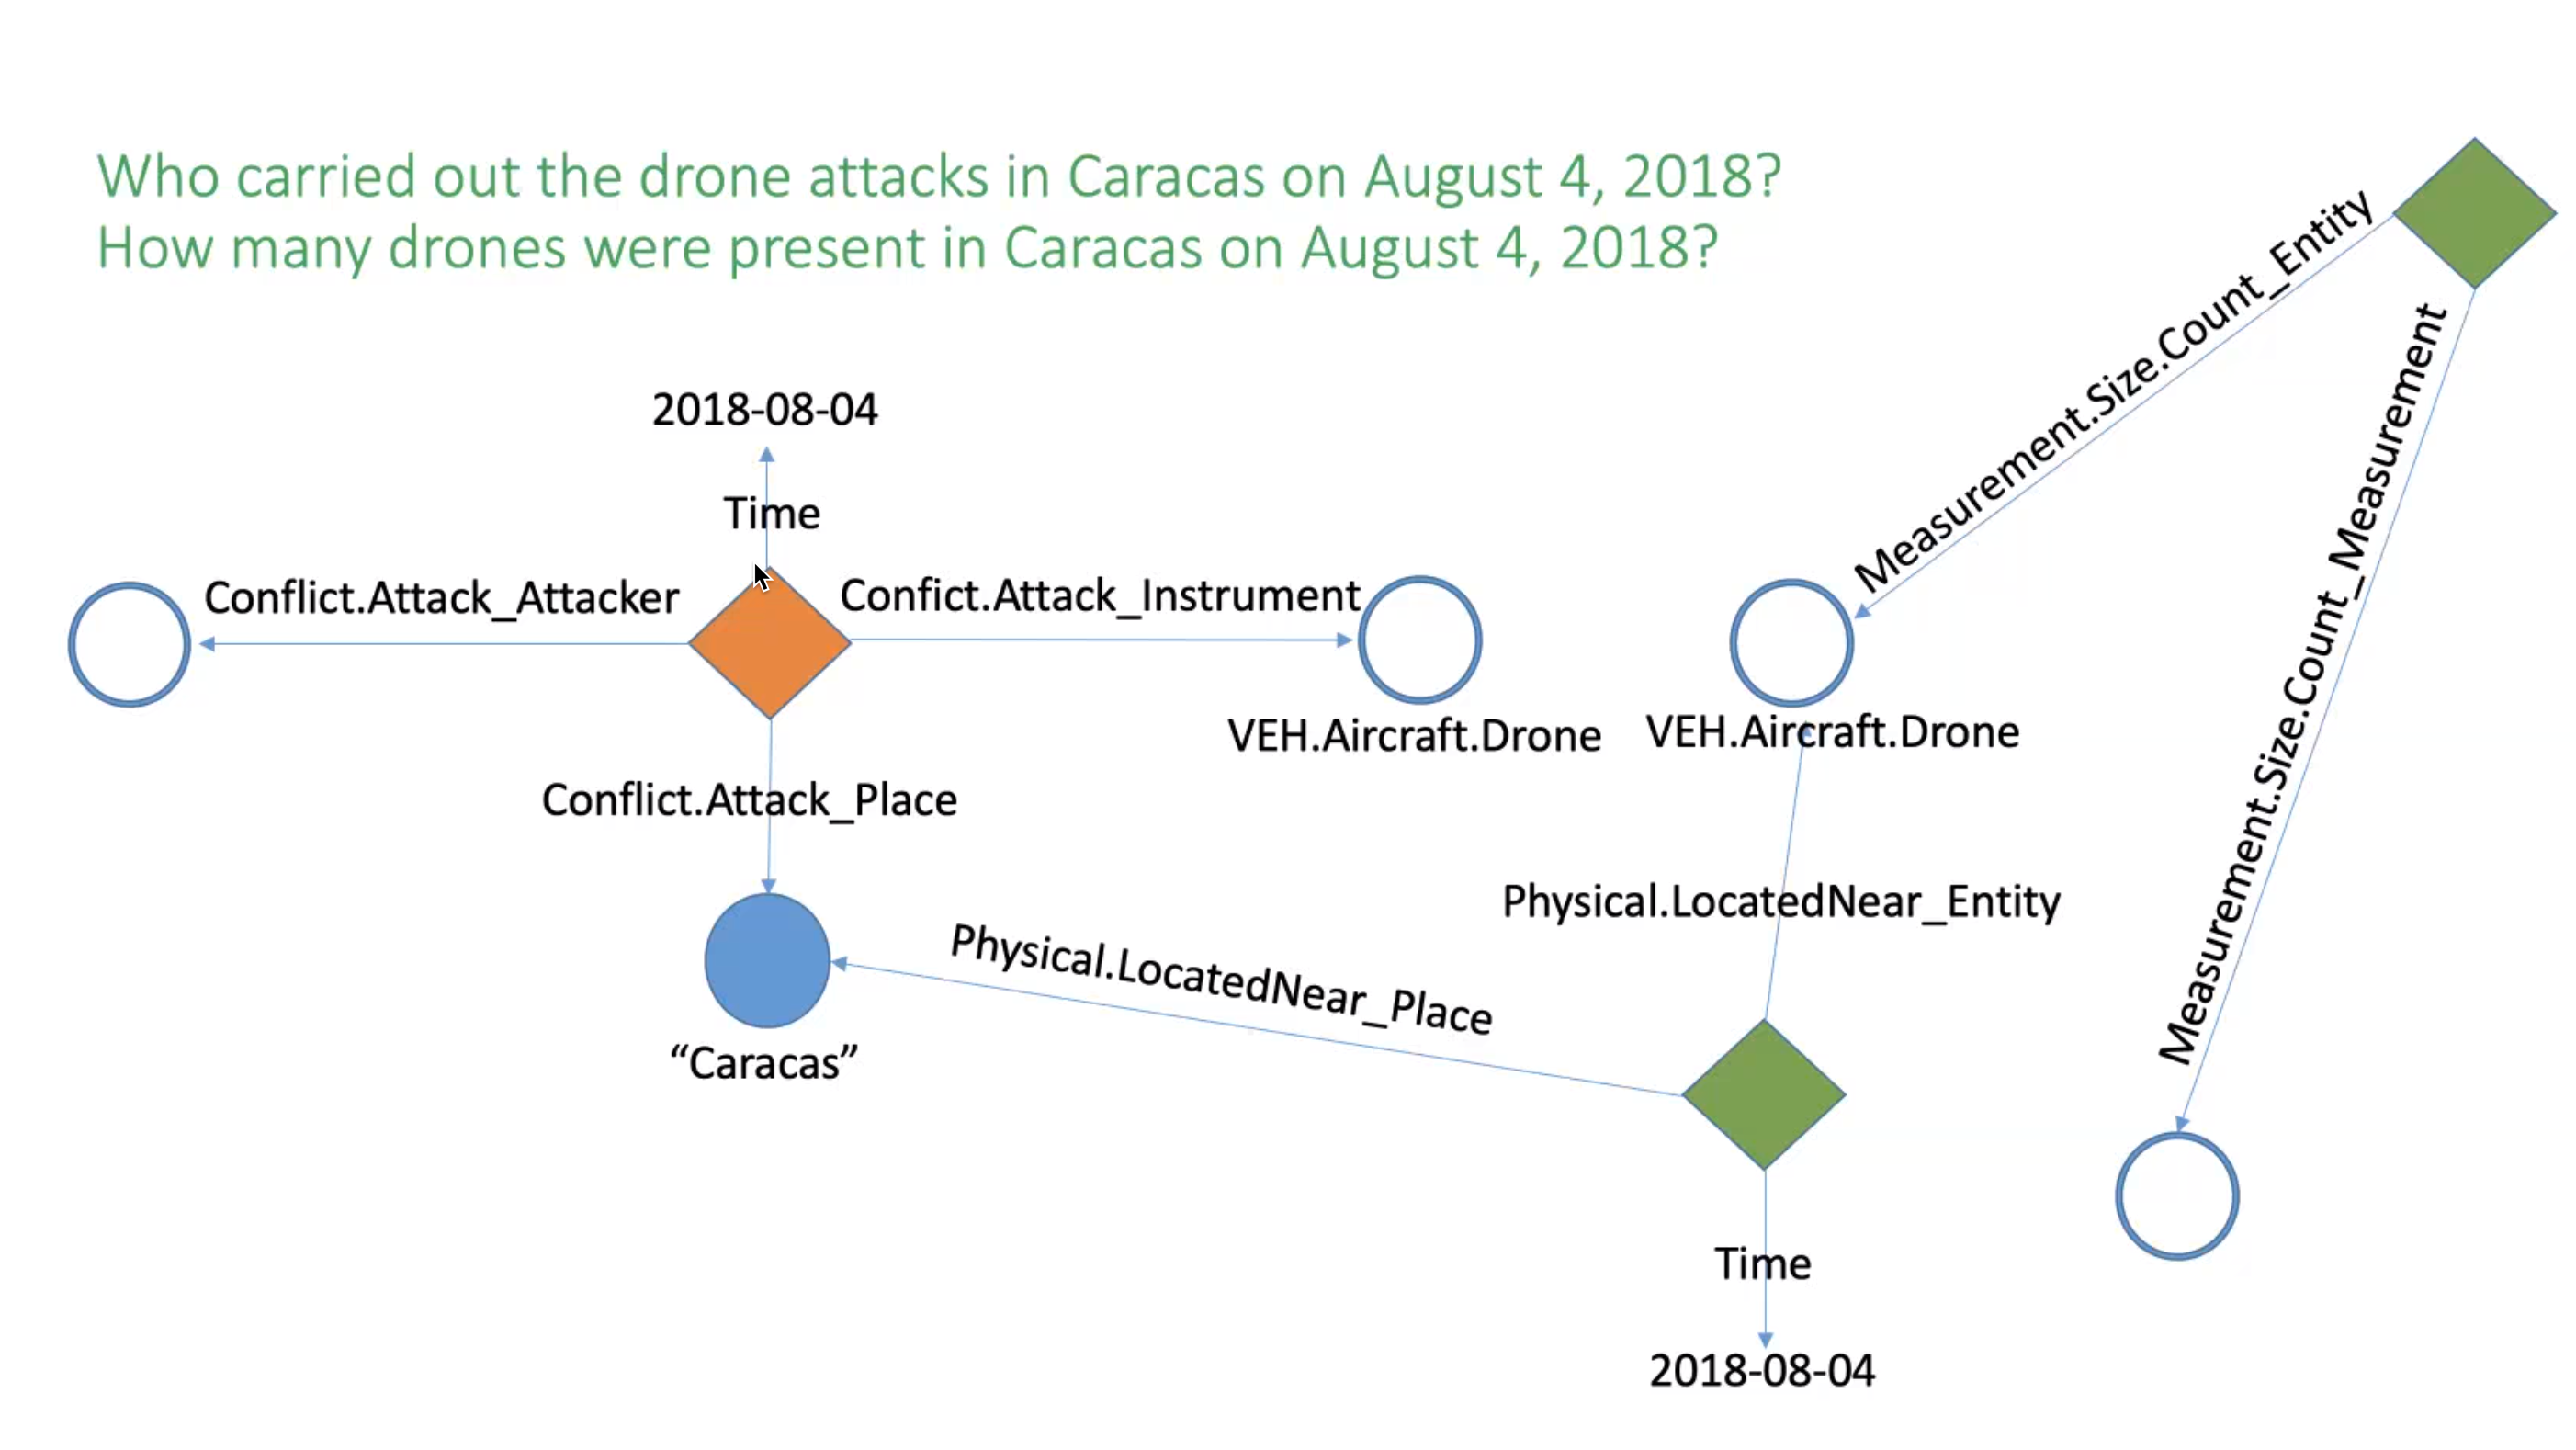

In [8]:
IMAGE_PATH = "/Users/pedroszekely/Downloads/"
Image(filename = IMAGE_PATH + "event-graph.png", width=700, height=700)

**Undo the reification, and put the justifications as annotations on the semantic edges**

In [9]:
!kgtk unreify_rdf_statements -i ta1/HC00001DO/HC00001DO.ttl.tsv \
  / sort --columns 1,2 \
  >  ta1/HC00001DO/HC00001DO.ttl.unreified.tsv

**Events now have direct edges to the role fillers (orange diamonds), the justifications are in the id object**

In [32]:
unreified = pd.read_csv("ta1/HC00001DO/HC00001DO.ttl.unreified.tsv", delimiter='\t')
unreified.loc[unreified.node1 == 'event:fd2323ad-b9c6-4b57-9228-8579b52475c8']

,node1,label,node2,id
51638,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ldc:Life.Die_Place,entity:584ecaed-6832-489c-8e45-2e63a460ab90,_:g3162
51639,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ldc:Life.Die_Victim,entity:10147d53-19e3-4b20-b144-02077ba0f2ac,_:g2654
51640,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ldc:Life.Die_Victim,entity:fbf6e4a1-54e2-423c-92e2-75b2f2aab53b,_:g8555
51641,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ont:informativeJustification,_:b1233,NaN
51642,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ont:justifiedBy,_:b1113,NaN
51643,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ont:justifiedBy,_:b1366,NaN
51644,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ont:justifiedBy,_:b1367,NaN
51645,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ont:justifiedBy,_:b301,NaN
51646,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ont:justifiedBy,_:b368,NaN
51647,event:fd2323ad-b9c6-4b57-9228-8579b52475c8,ont:justifiedBy,_:b642,NaN


**The relations are also objects with direct links to the entities (green diamonds)**

In [33]:
unreified.loc[unreified.node1 == 'relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d']

,node1,label,node2,id
54164,relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d,ldc:Physical.LocatedNear_EntityOrFiller,entity:5c64e1a6-d96a-41ef-b584-2c3c30757bf4,_:g6297
54165,relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d,ldc:Physical.LocatedNear_Place,entity:584ecaed-6832-489c-8e45-2e63a460ab90,_:g530
54166,relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d,ont:informativeJustification,_:b397,NaN
54167,relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d,ont:justifiedBy,_:b1096,NaN
54168,relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d,ont:system,rpi1:,NaN
54169,relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d,rdf:type,ldc:Physical.LocatedNear,isi:gaia/assertions/4d0acbd2-f7b3-49f8-abc4-84...
54170,relation:4b8f6334-dbc1-4186-8d9e-a04d864d9a9d,rdf:type,ont:Relation,NaN


## Create files to Work in TA2

**We want Pandas-friendly files, having a single rows for entities, relations and events.**

For initial analysis, let's remove justifications, etc.

In [12]:
!kgtk filter \
  --invert \
  -p ';ont:justifiedBy,ont:privateData,ont:system,ont:informativeJustification;' ta1/HC00001DO/HC00001DO.ttl.unreified.tsv \
  > ta1/HC00001DO/HC00001DO.ttl.unreified.nojust.tsv

**Split into a separate file for each of entities, relations and events**

In [13]:
!kgtk filter -p ';rdf:type;ont:Entity' ta1/HC00001DO/HC00001DO.ttl.unreified.tsv > ta1/HC00001DO/HC00001DO.entity_ids.tsv
!kgtk filter -p ';rdf:type;ont:Event' ta1/HC00001DO/HC00001DO.ttl.unreified.tsv > ta1/HC00001DO/HC00001DO.event_ids.tsv
!kgtk filter -p ';rdf:type;ont:Relation' ta1/HC00001DO/HC00001DO.ttl.unreified.tsv > ta1/HC00001DO/HC00001DO.relation_ids.tsv

In [14]:
# Get all entities from the unreified file
!kgtk ifexists \
    --input-keys node1 \
    --filter-keys node1 \
    --filter-on ta1/HC00001DO/HC00001DO.entity_ids.tsv \
    ta1/HC00001DO/HC00001DO.ttl.unreified.nojust.tsv \
  / sort --columns 1,2 \
  > ta1/HC00001DO/HC00001DO.entities.tsv

# Get all events from the unreified file
!kgtk ifexists \
    --input-keys node1 \
    --filter-keys node1 \
    --filter-on ta1/HC00001DO/HC00001DO.event_ids.tsv \
    ta1/HC00001DO/HC00001DO.ttl.unreified.nojust.tsv \
  / sort --columns 1,2 \
  > ta1/HC00001DO/HC00001DO.events.tsv

# Get all relations from the unreified file
!kgtk ifexists \
    --input-keys node1 \
    --filter-keys node1 \
    --filter-on ta1/HC00001DO/HC00001DO.relation_ids.tsv \
    ta1/HC00001DO/HC00001DO.ttl.unreified.nojust.tsv \
  / sort --columns 1,2 \
  > ta1/HC00001DO/HC00001DO.relations.tsv

**Little hack : replace ont:textValue by label**

In [15]:
!sed 's/ont:hasName/label/' ta1/HC00001DO/HC00001DO.entities.tsv \
  | sed 's/ont:textValue/label/' \
  > ta1/HC00001DO/HC00001DO.entities.renamed.tsv 

**Remove the type edges as they do not provide useful info (e.g., we know, by construction, the entities file contains entities)**

In [16]:
!kgtk filter \
  --invert \
  -p ';;ont:Entity' ta1/HC00001DO/HC00001DO.entities.renamed.tsv \
  > ta1/HC00001DO/HC00001DO.entities.notype.tsv
!kgtk filter \
  --invert \
  -p ';;ont:Relation' ta1/HC00001DO/HC00001DO.relations.tsv \
  > ta1/HC00001DO/HC00001DO.relations.notype.tsv
!kgtk filter \
  --invert \
  -p ';;ont:Event' ta1/HC00001DO/HC00001DO.events.tsv \
  > ta1/HC00001DO/HC00001DO.events.notype.tsv

## Let's make a file that has one entity per row
**Start by lifting the labels into a column**

In [17]:
!kgtk lift --suppress-empty-columns True ta1/HC00001DO/HC00001DO.entities.notype.tsv / sort > ta1/HC00001DO/HC00001DO.entities.labels.tsv

In [35]:
entities = pd.read_csv("ta1/HC00001DO/HC00001DO.entities.labels.tsv", delimiter='\t')
entities

,node1,label,node2,id,node1;label
0,entity:00dc3cab-0e7b-4020-a728-58bdfa65da1c,rdf:type,ldc:VAL,isi:gaia/assertions/85a6b0ff-e5b5-4bb5-94ba-8a...,NaN
1,entity:01a3f70d-b035-4717-b1ca-9eb2f20ff861,rdf:type,ldc:PER,rpi:finegrainedtype/01a3f70d-b035-4717-b1ca-9e...,NaN
2,entity:0289e355-3df3-4cf4-a76e-9369b4ee3a6f,rdf:type,ldc:VAL.Number.Number,isi:gaia/assertions/eec6fb9d-23de-44bd-b922-4a...,eleven
3,entity:052062d3-3a68-4f65-862b-56258ac68a0e,rdf:type,ldc:VAL.Number.Number,isi:gaia/assertions/2958ef28-ca2c-41de-8b0b-e6...,27
4,entity:0656fa46-811a-4f61-892a-fce3a8f305cd,rdf:type,ldc:VAL.Number.Number,isi:gaia/assertions/74786ace-6cd2-4bb0-88a2-0f...,42
...,...,...,...,...,...
263,entity:fbf6e4a1-54e2-423c-92e2-75b2f2aab53b,rdf:type,ldc:PER.Combatant,rpi:finegrainedtype/fbf6e4a1-54e2-423c-92e2-75...,NaN
264,entity:fbf6e4a1-54e2-423c-92e2-75b2f2aab53b,rdf:type,ldc:PER.MilitaryPersonnel,rpi:finegrainedtype/fbf6e4a1-54e2-423c-92e2-75...,NaN
265,entity:fcb78e77-4962-4fca-977b-aea84bfa3ddd,ont:link,_:g8366,NaN,Kramatorsk
266,entity:fcb78e77-4962-4fca-977b-aea84bfa3ddd,rdf:type,ldc:GPE.UrbanArea.City,rpi:finegrainedtype/fcb78e77-4962-4fca-977b-ae...,Kramatorsk


**Now lift the LDC link targets into a separate column, this is a bit complicated because of the extra level of reification**

In [19]:
!kgtk lift \
    --suppress-empty-columns True \
    --label-value ont:linkTarget \
    --lift-suffix ';temp' \
    --label-file ta1/HC00001DO/HC00001DO.ttl.unreified.tsv \
    ta1/HC00001DO/HC00001DO.entities.labels.tsv \
  / lift \
    --suppress-empty-columns True \
    --label-value ont:link \
    --lift-suffix ';linkTarget' \
    --node2-name 'node2;temp' \
  / sort \
  / remove_columns  -c 'node2;temp' \
  > ta1/HC00001DO/HC00001DO.entities.labels.linktargets.tsv

In [20]:
entities = pd.read_csv("ta1/HC00001DO/HC00001DO.entities.labels.linktargets.tsv", delimiter='\t')
entities

,node1,label,node2,id,node1;label,node1;linkTarget
0,entity:00dc3cab-0e7b-4020-a728-58bdfa65da1c,rdf:type,ldc:VAL,isi:gaia/assertions/85a6b0ff-e5b5-4bb5-94ba-8a...,NaN,NaN
1,entity:01a3f70d-b035-4717-b1ca-9eb2f20ff861,rdf:type,ldc:PER,rpi:finegrainedtype/01a3f70d-b035-4717-b1ca-9e...,NaN,NaN
2,entity:0289e355-3df3-4cf4-a76e-9369b4ee3a6f,rdf:type,ldc:VAL.Number.Number,isi:gaia/assertions/eec6fb9d-23de-44bd-b922-4a...,eleven,NaN
3,entity:052062d3-3a68-4f65-862b-56258ac68a0e,rdf:type,ldc:VAL.Number.Number,isi:gaia/assertions/2958ef28-ca2c-41de-8b0b-e6...,27,NaN
4,entity:0656fa46-811a-4f61-892a-fce3a8f305cd,rdf:type,ldc:VAL.Number.Number,isi:gaia/assertions/74786ace-6cd2-4bb0-88a2-0f...,42,NaN
...,...,...,...,...,...,...
221,entity:fbc758f0-d19f-4faa-bb06-d042f7884144,rdf:type,ldc:ORG.CommercialOrganization.NewsAgency,rpi:finegrainedtype/fbc758f0-d19f-4faa-bb06-d0...,NaN,NaN
222,entity:fbf6e4a1-54e2-423c-92e2-75b2f2aab53b,rdf:type,ldc:PER.Combatant,rpi:finegrainedtype/fbf6e4a1-54e2-423c-92e2-75...,NaN,NaN
223,entity:fbf6e4a1-54e2-423c-92e2-75b2f2aab53b,rdf:type,ldc:PER.MilitaryPersonnel,rpi:finegrainedtype/fbf6e4a1-54e2-423c-92e2-75...,NaN,NaN
224,entity:fcb78e77-4962-4fca-977b-aea84bfa3ddd,rdf:type,ldc:GPE.UrbanArea.City,rpi:finegrainedtype/fcb78e77-4962-4fca-977b-ae...,Kramatorsk,LDC2019E43:704508


**Statistics of fraction of entities have labels or link targets**

In [21]:
((entities.shape[0]-entities.isnull().sum())/entities.shape[0]).round(3)

node1               1.000
label               1.000
node2               1.000
id                  1.000
node1;label         0.500
node1;linkTarget    0.102
dtype: float64

**Distribution of types**

In [22]:
entities['node2'].value_counts()

ldc:VAL.Number.Number                                 69
ldc:VAL                                               33
ldc:PER                                               17
ldc:GPE.UrbanArea.City                                 8
ldc:FAC.Building                                       7
ldc:TTL                                                7
ldc:ORG.MilitaryOrganization.GovernmentArmedForces     6
ldc:VEH.WheeledVehicle                                 5
ldc:ORG.MilitaryOrganization                           5
ldc:PER.Combatant                                      4
ldc:GPE.Country.Country                                4
ldc:WEA.ThrownProjectile                               3
ldc:LOC.Position.Region                                3
ldc:FAC.Structure                                      3
ldc:PER.MilitaryPersonnel                              2
ldc:SID                                                2
ldc:ORG.Association                                    2
ldc:PER.ProfessionalPosition.Mi

**Add the labels of the entities to the event file**

In [23]:
!kgtk filter \
  -p ';label;' ta1/HC00001DO/HC00001DO.entities.renamed.tsv \
  > ta1/HC00001DO/HC00001DO.entities.renamed.labels.tsv

In [24]:
!kgtk join ta1/HC00001DO/HC00001DO.events.notype.tsv ta1/HC00001DO/HC00001DO.entities.renamed.labels.tsv \
  --left-join \
  --left-file-join-columns node2 \
  --right-file-join-columns node1 \
  / lift --suppress-empty-columns \
  > ta1/HC00001DO/HC00001DO.events.notype.entity-labels.tsv

In [25]:
events = pd.read_csv("ta1/HC00001DO/HC00001DO.events.notype.entity-labels.tsv", delimiter='\t')
display(HTML(events[:10].to_html()))

,node1,label,node2,id,node2;label
0,event:03a41b2b-e0ef-42f9-a192-433e0abc3a70,ldc:Movement.TransportPerson.SelfMotion_Destination,entity:fcb78e77-4962-4fca-977b-aea84bfa3ddd,_:g3910,Kramatorsk
1,event:03a41b2b-e0ef-42f9-a192-433e0abc3a70,ldc:Movement.TransportPerson.SelfMotion_Transporter,entity:c6f32b90-6038-40c0-97e4-6d3f7fd76c03,_:g2301,NaN
2,event:03a41b2b-e0ef-42f9-a192-433e0abc3a70,ont:ldcTime,_:g1591,NaN,NaN
3,event:03a41b2b-e0ef-42f9-a192-433e0abc3a70,rdf:type,ldc:Movement.TransportPerson.SelfMotion,isi:gaia/assertions/536bb130-8e3a-494a-a1a6-af4b8036b6e9,NaN
4,event:040acd27-8ba6-440a-b8e3-f246ff715e36,ldc:Transaction.TransferOwnership_Artifact,entity:1d3a1800-b45e-4053-a9e2-c8cfd86c2cd0,_:g5643,NaN
5,event:040acd27-8ba6-440a-b8e3-f246ff715e36,ldc:Transaction.TransferOwnership_Recipient,entity:71be8687-73db-492c-9930-93143e7da8ca,_:g8134,NaN
6,event:040acd27-8ba6-440a-b8e3-f246ff715e36,ont:ldcTime,_:g310,NaN,NaN
7,event:040acd27-8ba6-440a-b8e3-f246ff715e36,rdf:type,ldc:Transaction.TransferOwnership,isi:gaia/assertions/3853a6ae-7bd9-4d93-848d-018f39d59120,NaN
8,event:084e9f10-7424-4a9c-9f51-87ea580a58a7,ldc:Conflict.Attack_Attacker,entity:71be8687-73db-492c-9930-93143e7da8ca,_:g673,NaN
9,event:084e9f10-7424-4a9c-9f51-87ea580a58a7,ldc:Conflict.Attack_Instrument,entity:e7ff9d5c-c284-42b5-8f63-97e25a71e787,_:g637,NaN


In [26]:
events['node1'].value_counts()[:10]

event:519cf108-2005-4d3d-b82c-a4309db8992e    9
event:dab890d7-aa46-4e1f-9309-e7c2834a164d    8
event:4e2721c1-4bf6-436f-8cdb-433e2baf0e23    7
event:a1d9f832-cd56-446e-b5e0-a119b8977165    7
event:2b923f37-5105-40cf-8f86-0832b03951bf    7
event:5bf27170-c02b-4504-828e-0b53606c56c2    7
event:919a8bb7-6ac8-4f9c-bd41-73d4f544cca3    6
event:084e9f10-7424-4a9c-9f51-87ea580a58a7    5
event:a94980a7-40f4-456c-8ce9-3bbec02e4674    5
event:547318e3-a0f6-478e-a167-3a78b4bccf72    5
Name: node1, dtype: int64

### Work with clusters

In [27]:
!kgtk filter -p ';ont:clusterMember;' ta1/HC00001DO/HC00001DO.ttl.unreified.tsv > ta1/HC00001DO/HC00001DO.ttl.clusters.tsv

In [28]:
!kgtk join ta1/HC00001DO/HC00001DO.ttl.clusters.tsv ta1/HC00001DO/HC00001DO.entities.notype.tsv \
  --left-file-join-columns node2 \
  --right-file-join-columns node1 \
  > ta1/HC00001DO/HC00001DO.cluster.ids.entities.tsv 
!kgtk join ta1/HC00001DO/HC00001DO.ttl.clusters.tsv ta1/HC00001DO/HC00001DO.relations.notype.tsv \
  --left-file-join-columns node2 \
  --right-file-join-columns node1 \
  > ta1/HC00001DO/HC00001DO.cluster.ids.relations.tsv 
!kgtk join ta1/HC00001DO/HC00001DO.ttl.clusters.tsv ta1/HC00001DO/HC00001DO.events.notype.tsv \
  --left-file-join-columns node2 \
  --right-file-join-columns node1 \
  > ta1/HC00001DO/HC00001DO.cluster.ids.events.tsv 

In [29]:
!kgtk ifexists \
  --input-keys node1 \
  --filter-keys node1 \
  --filter-on ta1/HC00001DO/HC00001DO.cluster.ids.entities.tsv \
    ta1/HC00001DO/HC00001DO.ttl.unreified.tsv \
  > ta1/HC00001DO/HC00001DO.cluster.entities.tsv 
!kgtk ifexists \
  --input-keys node1 \
  --filter-keys node1 \
  --filter-on ta1/HC00001DO/HC00001DO.cluster.ids.relations.tsv \
    ta1/HC00001DO/HC00001DO.ttl.unreified.tsv \
  > ta1/HC00001DO/HC00001DO.cluster.relations.tsv 
!kgtk ifexists \
  --input-keys node1 \
  --filter-keys node1 \
  --filter-on ta1/HC00001DO/HC00001DO.cluster.ids.events.tsv \
    ta1/HC00001DO/HC00001DO.ttl.unreified.tsv \
  > ta1/HC00001DO/HC00001DO.cluster.events.tsv 

### Create and edge file with ids to load in Wikidata SPARQL and browse using SQID

In [30]:
!kgtk add_id ta1/HC00001DO/HC00001DO.ttl.unreified.tsv  > ta1/HC00001DO/HC00001DO.ttl.unreified.ids.tsv

In [31]:
# Read KGTK results into lines and directly into Pandas
# lines = !kgtk filter -p ';prefix_expansion;' ta1/HC00001DO/HC00001DO.ttl.tsv
# pd.read_csv(io.StringIO('\n'.join(lines)), delimiter='\t')